In [34]:
# Data manipulation
import numpy as np
import pandas as pd
import glob

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Excel reading (if needed)
import xlrd  # for older .xls files
# import openpyxl  # for modern .xlsx files

# HTTP requests and web scraping
import requests
from bs4 import BeautifulSoup

# Warnings'
import warnings
warnings.filterwarnings('ignore')  # optional: to ignore warnings

In [35]:
df = pd.read_csv("/Users/Goldie/Desktop/Ironhack/Project/IronHack-w3-Modual1-Project3/Data/Clean/The Immaculate Data.csv")
country_df = pd.read_csv("/Users/Goldie/Desktop/Ironhack/Project/IronHack-w3-Modual1-Project3/Data/Clean/country_area_mapping.csv")
country_df = country_df.rename(columns={'Nationality': 'Country', 'area': 'Continent'})
exclude_positions = ["Substitute", "Reserve", "Unknown"]
df_merged = df.merge(country_df, left_on = "Nationality", right_on = "Country", how ="left")

df_merged = df_merged[df_merged['2019 Value'] > 0]

In [36]:
exclude_positions = ["Substitute", "Reserve", "Unknown"]
df_merged = df_merged[
    ~df_merged['Position'].isin(exclude_positions)
]

In [37]:
df_merged['Value_Growth_%'] = (
    (df_merged['2023 Value'] - df_merged['2019 Value'])
    / df_merged['2019 Value']
) * 100

In [38]:
df_merged['Value_Change'] = (
    df_merged['2023 Value'] - df_merged['2019 Value']
)
df_filtered = df_merged[df_merged['2019 Value'] >= 1_000_000]

In [39]:
continent_totals = (
    df_filtered
    .groupby('Continent')[['2019 Value', '2023 Value']]
    .sum()
)

In [40]:
continent_totals['Portfolio_Growth_%'] = (
    (continent_totals['2023 Value'] - continent_totals['2019 Value'])
    / continent_totals['2019 Value']
) * 100

continent_totals.sort_values('Portfolio_Growth_%', ascending=False)

,2019 Value,2023 Value,Portfolio_Growth_%
Continent,,,
Africa,968399999,1399499999,44.516729
Europe,10518299995,14439974996,37.284305
North America,320700000,428219999,33.526660
South America,3032699998,3531949997,16.462228
Asia,258600000,277775000,7.414927
Oceania,38400000,23325000,-39.257812


In [41]:
position_growth = (
    df_filtered
    .groupby('Position')['Value_Growth_%']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)

In [72]:
country_summary = (
    df_filtered.groupby('Nationality')
    .agg(avg_growth_pct=('Value_Growth_%', 'mean'),
        player_count=('Value_Growth_%', 'count'))
)
top_countries = (
    country_summary[country_summary['player_count'] >= 5]
    .sort_values('avg_growth_pct', ascending=False)
    .head(10)
    .reset_index()
)

In [43]:
position_growth = (
    df_filtered
    .groupby('Position')['Value_Growth_%']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)

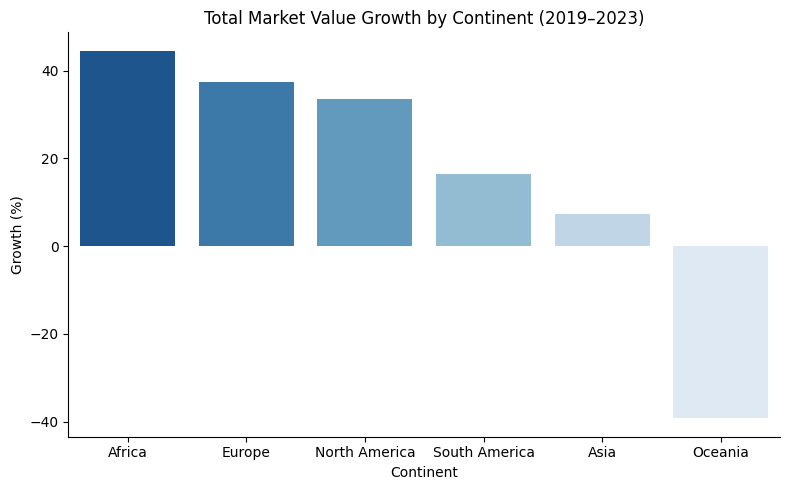

In [74]:
continent_plot = (
    continent_totals
    .sort_values('Portfolio_Growth_%', ascending=False)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=continent_plot,
    x='Continent',
    y='Portfolio_Growth_%',
    palette="Blues_r"
)

plt.title("Total Market Value Growth by Continent (2019–2023)")
plt.ylabel("Growth (%)")
plt.xlabel("Continent")

sns.despine()
plt.tight_layout()
plt.show()

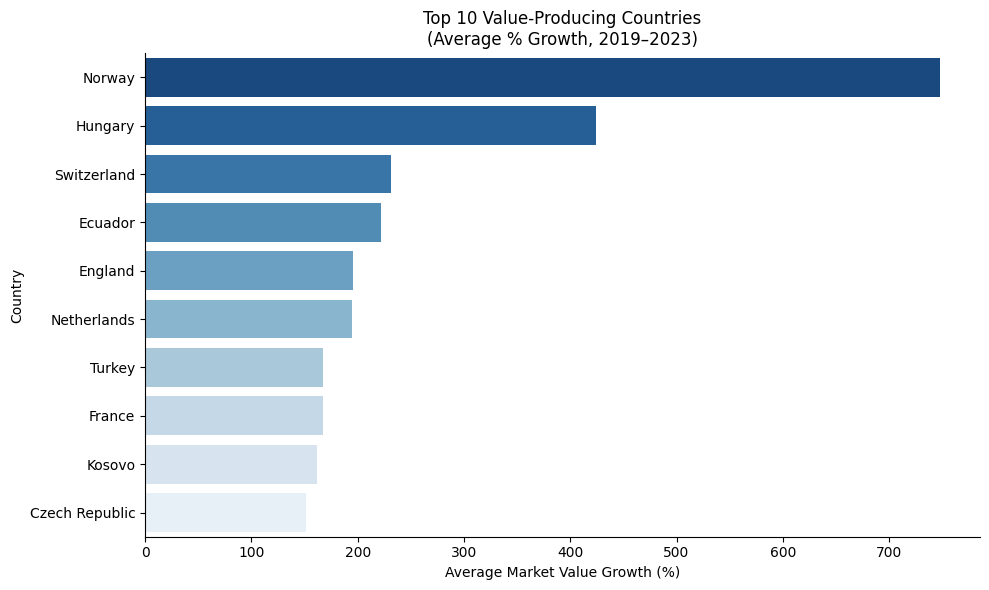

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_countries,
    y='Nationality',
    x='avg_growth_pct',
    palette="Blues_r"
)

plt.title("Top 10 Value-Producing Countries\n(Average % Growth, 2019–2023)")
plt.xlabel("Average Market Value Growth (%)")
plt.ylabel("Country")

sns.despine()
plt.tight_layout()
plt.show()

In [102]:
df_filtered[df_filtered["Nationality"] == "Norway"].sort_values(by="Value_Growth_%", ascending = False)

,ID,Name,Nationality,Overall,Wage,Preferred Foot,Work Rate,Body Type,Position,Height,...,2019 Value,2020 Value,2021 Value,2022 Value,2023 Value,Total Clubs 2019-2023,Country,Continent,Value_Growth_%,Value_Change
2286,239085,E. Haaland,Norway,88,220000,Left,High/ Medium,Unique,Striker,195,...,1800000,22500000,45000000,137500000,148000000,3,Norway,Europe,8122.222222,146200000
838,231913,F. Aursnes,Norway,78,12000,Right,Medium/ High,Lean (170-185),Right Centre Midfield,179,...,1200000,2200000,2800000,2400000,15000000,2,Norway,Europe,1150.000000,13800000
1514,222665,M. Ødegaard,Norway,84,105000,Left,High/ Medium,Lean (170-185),Centre Attacking Midfield,178,...,13500000,30500000,36000000,49000000,63500000,4,Norway,Europe,370.370370,50000000
1555,219466,B. Meling,Norway,76,37000,Left,High/ High,Lean (170-185),Left Back,174,...,2000000,2800000,3600000,6500000,8000000,3,Norway,Europe,300.000000,6000000
2198,237502,D. Johnsen,Norway,73,5000,Right,Medium/ Low,Lean (185+),Left Striker,185,...,1500000,1100000,1100000,2300000,4400000,3,Norway,Europe,193.333333,2900000
1823,242162,H. Evjen,Norway,72,8000,Left,High/ High,Lean (170-185),Right Wing,178,...,1800000,4400000,4099999,4200000,4800000,2,Norway,Europe,166.666667,3000000
1647,224258,K. Ajer,Norway,75,33000,Right,High/ High,Normal (185+),Right Centre Back,196,...,5500000,7500000,5500000,11500000,11500000,2,Norway,Europe,109.090909,6000000
1931,216549,A. Sørloth,Norway,76,48000,Left,High/ Medium,Normal (185+),Right Midfield,194,...,5500000,12000000,12000000,10000000,9500000,4,Norway,Europe,72.727273,4000000
935,222475,M. Thorsby,Norway,74,26000,Right,High/ High,Normal (185+),Left Centre Midfield,189,...,3200000,2400000,1400000,4400000,5000000,4,Norway,Europe,56.250000,1800000
1724,215195,S. Svendsen,Norway,68,6000,Right,High/ Medium,Normal (170-185),Left Wing,172,...,1200000,1100000,1300000,1700000,1600000,3,Norway,Europe,33.333333,400000


In [84]:
top_countries_plot = top_countries.sort_values(
    'avg_growth_pct',
    ascending=False
)

position_plot = (
    position_growth
    .sort_values('Value_Growth_%', ascending=False)
)

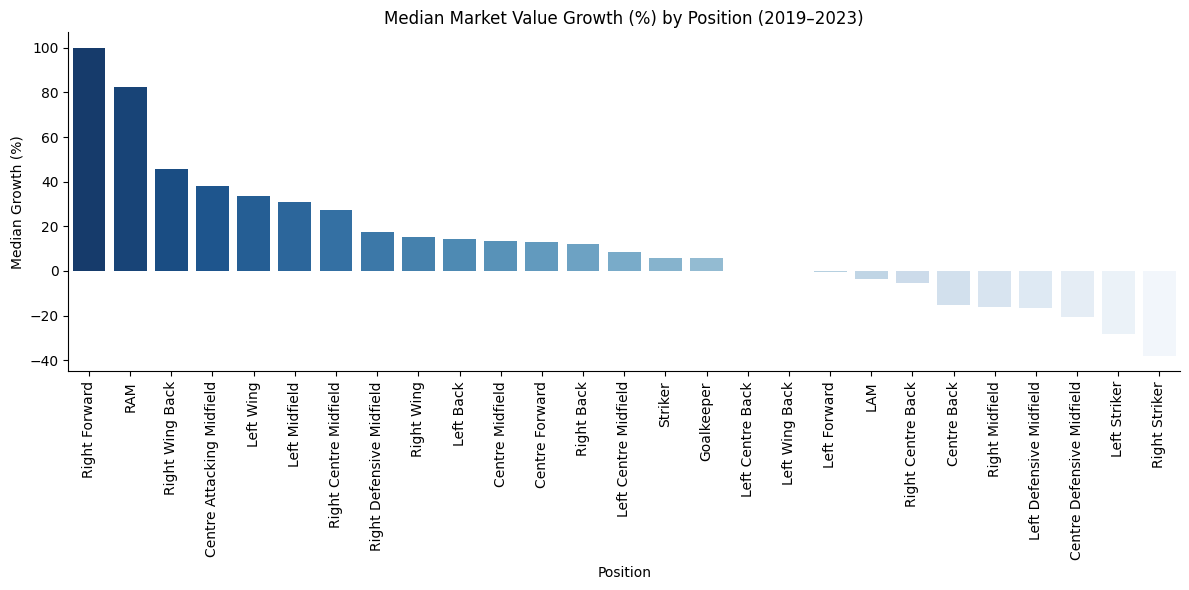

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=position_plot,
    x='Position',
    y='Value_Growth_%',
    palette="Blues_r"
)

plt.title("Median Market Value Growth (%) by Position (2019–2023)")
plt.xlabel("Position")
plt.ylabel("Median Growth (%)")
plt.xticks(rotation=90)

sns.despine()
plt.tight_layout()
plt.show()

<Axes: xlabel='avg_growth_pct', ylabel='Nationality'>

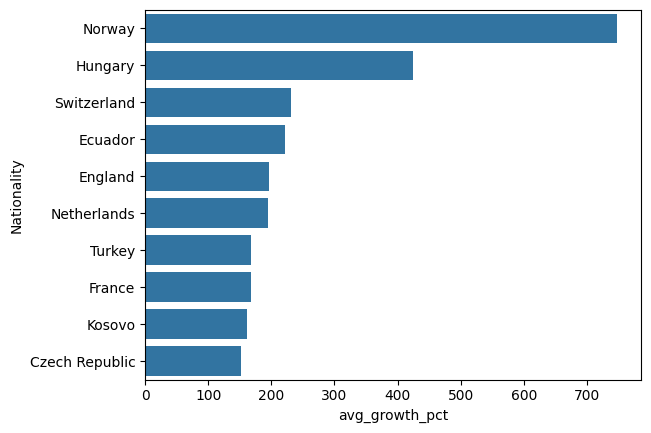

In [88]:
sns.barplot(
    data=top_countries_plot,
    y='Nationality',
    x='avg_growth_pct',
    order=top_countries_plot['Nationality']
)